In [17]:
import heapq as hp
import random
import matplotlib.pyplot as plt

In [18]:
def sim(collect_rate = 0.96, num_per_day=2, dur_easy = 30, base_rate = 2.5):
    easy_bonus = 1.3  # 簡単と回答した時のボーナス
    wrong_penalty = 0.2  # 間違えた時のペナルティ よくわからない・・・
    collect_rate_first = 0.5  # 最初の正答率
    dur_norm = 7  # 復習開始までの間隔
    day_last = 356*3  # 何日間やるか

    que = []
    ans = 0
    # 初日
    day = 0

    for day in range(day_last):
        for _ in range(num_per_day):
            if que and que[0][0] <= day:
                # 期日を過ぎている場合は、復習開始
                pre_day, pre_dur, pre_rate = hp.heappop(que)
                if random.random() >= collect_rate:
                    # 不正解だった場合
                    cur_day = day + 1  # 翌日にやる
                    cur_dur = dur_norm
                    cur_rate = pre_rate - wrong_penalty
                    cur_rate = max(cur_rate, 1.3)
                    hp.heappush(que, (cur_day, cur_dur, cur_rate))
                else:
                    # 正解だった場合
                    cur_dur = pre_dur * base_rate * easy_bonus
                    cur_day = day + cur_dur
                    cur_rate = pre_rate * easy_bonus
                    hp.heappush(que, (cur_day, cur_dur, cur_rate))
            else:
                # 期日を迎えたカードがない
                ans += 1
                if random.random() >= collect_rate_first:
                    hp.heappush(que, (day+dur_norm, dur_norm, base_rate))
                else:
                    hp.heappush(que, (day+dur_easy, dur_easy, base_rate*easy_bonus))

    """
    print('毎日', num_per_day, '問を', day_last, '日間解くと', ans, '問覚えることができる')
    print('一週間で新たに', ans/day_last*7, '問覚えるペース')
    print('一枚当たり平均', day_last*num_per_day/ans, '回復習する')
    """
    return ans/day_last*7


In [19]:
dat = [[0]*2 for _ in range(100)]
for r in range(100):
    dat[r][0] = r
    dat[r][1] = sim(r/100, 6, 30, 2.5)
# print(dat)

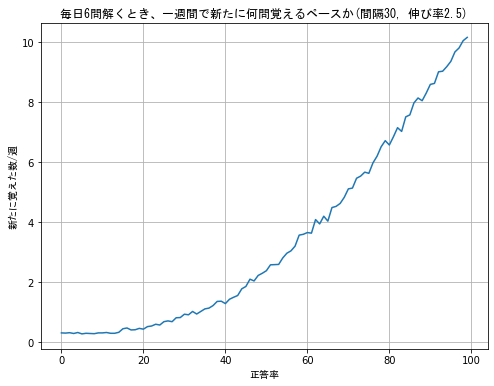

正答率が90%前後あれば、十分な学習効果を期待できる


In [20]:
xdata = [i[0] for i in dat]
ydata = [i[1] for i in dat]
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、一週間で新たに何問覚えるペースか(間隔30, 伸び率2.5)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('正答率', fontname="MS Gothic")
plt.ylabel('新たに覚えた数/週', fontname="MS Gothic")
plt.plot(xdata, ydata)
plt.show()
print('正答率が90%前後あれば、十分な学習効果を期待できる')

In [21]:
dat2 = [[0]*2 for _ in range(100)]
for r in range(100):
    dat2[r][0] = r
    dat2[r][1] = sim(90/100, 6, r, 2.5)
# print(dat)

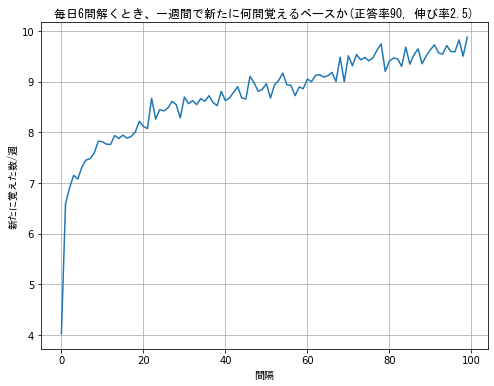

復習間隔を長くしたとしても、学習効果は頭打ちとなる


In [22]:
xdata = [i[0] for i in dat2]
ydata = [i[1] for i in dat2]
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、一週間で新たに何問覚えるペースか(正答率90, 伸び率2.5)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('間隔', fontname="MS Gothic")
plt.ylabel('新たに覚えた数/週', fontname="MS Gothic")
plt.plot(xdata, ydata)
plt.show()
print('復習間隔を長くしたとしても、学習効果は頭打ちとなる')

In [23]:
dat3 = [[0]*2 for _ in range(100)]
for r in range(100):
    dat3[r][0] = 1+r/10
    dat3[r][1] = sim(90/100, 6, 30, 1+r/10)
# print(dat)

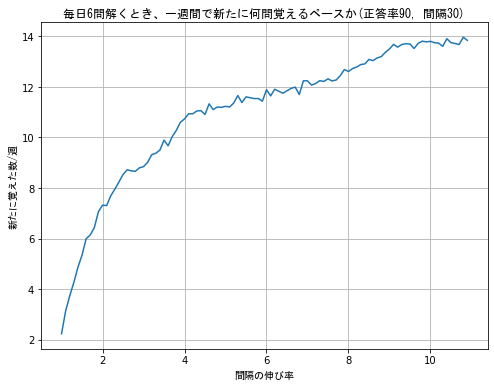

学習間隔の伸び率を長くしたとしても、学習効果は頭打ちとなる


In [25]:
xdata = [i[0] for i in dat3]
ydata = [i[1] for i in dat3]
plt.figure(figsize=(8, 6))
plt.title('毎日6問解くとき、一週間で新たに何問覚えるペースか(正答率90, 間隔30)', fontname="MS Gothic")
plt.grid(True)
plt.xlabel('間隔の伸び率', fontname="MS Gothic")
plt.ylabel('新たに覚えた数/週', fontname="MS Gothic")
plt.plot(xdata, ydata)
plt.show()
print('学習間隔の伸び率を長くしたとしても、学習効果は頭打ちとなる')